<a href="https://colab.research.google.com/github/kioneta/ML_first_steps/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import cross_val_score

In [ ]:
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [ ]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [ ]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.isnull().sum() #смотрим где много пропущено значений

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
X = titanic_data.drop(['PassengerId', 'Survived','Name','Ticket','Cabin'], axis = 1)

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
y = titanic_data.Survived

In [ ]:
X = pd.get_dummies(X) #преобразовывает стринговые строки в 0 и 1

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
X = X.fillna({'Age': X.Age.median()}) #Заполняем все пропущенные значения медианным значением

In [ ]:
clf = tree.DecisionTreeClassifier() #создаем объект к которому можем использовать методы

In [ ]:
clf.fit(X, y)

DecisionTreeClassifier()

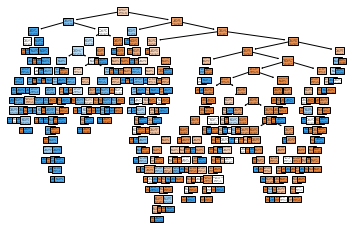

In [ ]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
# Разбиваем выборку на тренировочную часть и тестовую

In [ ]:
X_train.shape

(596, 10)

In [ ]:
X_test.shape

(295, 10)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
clf.score(X_test,y_test)

0.7288135593220338

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
max_depth_values = range(1,100)

In [ ]:
scores_data = pd.DataFrame()

In [ ]:
cross_val_score(clf,X_train, y_train, cv=5).mean()
#разбиваем все точки на 5 групп и считаем их как тест и трейн

0.8003921568627451

In [ ]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test,y_test)

    mean_cross_val_score = cross_val_score(clf,X_train, y_train, cv=5).mean()
    #записываем среднее значение и при кросс валидации
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)
# Прогоняем углубление дерева решения и для каждого варианта записываем дф

C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.

C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.

C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Kristina\AppData\Local\Temp\ipykernel_14212\3033521014.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.

In [ ]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.798711


In [ ]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

NameError: name 'scores_data_long' is not defined

In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')
#преобразовываем в нужный формат данные

In [ ]:
scores_data_long.head()

In [ ]:
sns.lineplot(x = 'max_depth',y  = 'score', hue='set_type', data = scores_data_long, width=3)

In [ ]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
cross_val_score(clf,X_test,y_test,cv=5).mean()

In [ ]:
GRUDSEARCHCV # помогает сделать код выше и быстрее

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [ ]:
import numpy  as np

In [ ]:
paramentrs = {'criterion': ['gini','entropy'],'max_depth': range(1,30)}

In [ ]:
grid_search_cv_clf = GridSearchCV(clf, paramentrs, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [ ]:
# показывает лучшие параметры.
#Лучше зафиксировать скорость, чтобы показывал одинаковый результат
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
#сохранили дерево с подобранными выше параметрами
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
#точность предсказания
best_clf.score(X_test,y_test)

0.7932203389830509

In [ ]:
РАСЧЕТ МЕТРИК ДЛЯ ДЕРЕВА

In [ ]:
#
from sklearn.metrics import precision_score, recall_score

In [ ]:
# предсказываем (y^) по тестовым х
y_pred = best_clf.predict(X_test)

In [ ]:
# вставляем предсказанные значения (y^) и фактические y
precision_score(y_test,y_pred)

0.8105263157894737

In [ ]:
recall_score(y_test,y_pred)

0.6416666666666667

In [ ]:
#относит к погибшим (0) или выжившим (1)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [ ]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [ ]:
#показывает с какой вероятности мы относим пассажира к выжившему или погибшему
#сумма 1
y_predicted_prob

array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ],
       [0.93913043, 0.06086957],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.93913043, 0.06086957],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.93913043, 0.06086957],
       [0.63157895, 0.36842105],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

<AxesSubplot:>

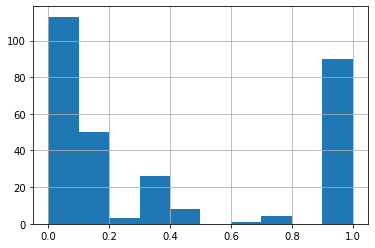

In [ ]:
pd.Series(y_predicted_prob[:,1]).hist()

In [ ]:
pd.Series(y_predicted_prob[:,1]).describe()

count    295.000000
mean       0.400412
std        0.420104
min        0.000000
25%        0.060870
50%        0.181818
75%        1.000000
max        1.000000
dtype: float64

In [ ]:
# меняем порог отнесения к выжившим
y_pred_new = np.where(y_predicted_prob[:,1]>0.6, 1, 0)

In [ ]:
#точность
precision_score(y_test,y_pred_new)

0.8105263157894737

In [ ]:
#полнота
recall_score(y_test,y_pred_new)

0.6416666666666667

In [ ]:
РОК КРИВАЯ


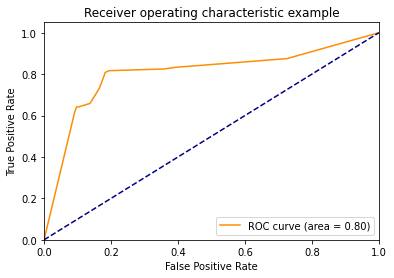

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()